In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
# Загрузка тестовых данных MNIST
(_, _), (test_images, test_labels) = mnist.load_data()
# Нормализация данных
test_images = test_images / 255.0
# Загрузка обученной модели
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CollabFiles/mnist_model.h5')
test_labels = to_categorical(test_labels, num_classes=10)
# Проверка точности модели на обычных данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy on clean images: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9723 - loss: 0.0919
Test accuracy on clean images: 0.9757999777793884


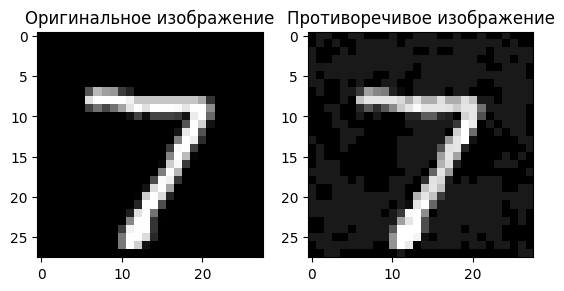

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Функция для реализации FGSM атаки
def fgsm_attack(image, epsilon, gradient):
    # Применение знака градиента к изображению
    perturbed_image = image + epsilon * np.sign(gradient)
    # Обрезка значений, чтобы они оставались в пределах [0,1]
    perturbed_image = np.clip(perturbed_image, 0, 1)
    return perturbed_image

# Функция для генерации противоречивого примера
def generate_adversarial_example(model, image, label, epsilon):
    # Превращение изображения в формат, подходящий для модели
    image = tf.convert_to_tensor(image.reshape((1, 28, 28, 1)), dtype=tf.float32)
    label = tf.convert_to_tensor([label], dtype=tf.int32)  # Преобразуем метку в массив с индексом класса

    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        loss = tf.keras.losses.sparse_categorical_crossentropy(label, prediction)

    # Получение градиента по отношению к входному изображению
    gradient = tape.gradient(loss, image)

    # Применение FGSM
    adversarial_image = fgsm_attack(image.numpy(), epsilon, gradient.numpy())
    return adversarial_image

# Пример использования
epsilon = 0.1
adversarial_example = generate_adversarial_example(model, test_images[0], test_labels[0], epsilon)

# Вывод результатов
plt.figure()
plt.subplot(1, 2, 1)
plt.title("Оригинальное изображение")
plt.imshow(test_images[0].reshape(28, 28), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Противоречивое изображение")
plt.imshow(adversarial_example.reshape(28, 28), cmap="gray")
plt.show()

In [ ]:
# Генерация противоречивых примеров для всего набора данных
def generate_adversarial_dataset(model, images, labels, epsilon):
  adversarial_images = []
  for i in range(len(images)):
    adv_image = generate_adversarial_example(model, images[i], labels[i], epsilon)
    adversarial_images.append(adv_image.squeeze())

  adversarial_images = np.array(adversarial_images, dtype=np.float32)
  adversarial_images = tf.convert_to_tensor(adversarial_images, dtype=tf.float32)
  adversarial_images = tf.convert_to_tensor(adversarial_images, dtype=tf.float32)
  return adversarial_images


adversarial_images = generate_adversarial_dataset(model, test_images, test_labels, epsilon)
adversarial_loss, adversarial_acc = model.evaluate(adversarial_images, to_categorical(test_labels, num_classes=10))
print(f'Accuracy on adversarial examples: {adversarial_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0794 - loss: 6.7191
Accuracy on adversarial examples: 0.10570000112056732


Вывод: после применениея атаки FGSM на модель искусственного интеллекта ее точность снизилась с 98% до 11%.